# PACKAGES AND LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import missingno as msno
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import levene
from scipy.stats import shapiro
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import scale
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

In [2]:
filterwarnings("ignore", category=DeprecationWarning) 
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning) 

# DATA SOURCE

In [3]:
Diabetes = pd.read_csv("../input/diabetes-data-set/diabetes.csv") # main

In [4]:
data = Diabetes.copy() # copy to protect master data

In [6]:
df = data.select_dtypes(include=["float64","int64","int32"]) # for mathematical analysis, to guarantee even though it is not necessary

## Exploratory Data Analysis

In [23]:
print(data.head(10))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   2

In [7]:
print(data.shape)

(768, 9)


In [8]:
print(data.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [10]:
print(data.describe().T)

                          count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinT

In [11]:
print(df.corr())

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

In [13]:
print(data.groupby(["Outcome"])["Pregnancies"].mean())

Outcome
0    3.298000
1    4.865672
Name: Pregnancies, dtype: float64


In [15]:
print(data.groupby(["Outcome"])["Glucose"].mean())

Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64


In [16]:
print(data.groupby(["Outcome"])["BloodPressure"].mean())

Outcome
0    68.184000
1    70.824627
Name: BloodPressure, dtype: float64


In [17]:
print(data.groupby(["Outcome"])["SkinThickness"].mean())

Outcome
0    19.664000
1    22.164179
Name: SkinThickness, dtype: float64


In [18]:
print(data.groupby(["Outcome"])["Insulin"].mean())

Outcome
0     68.792000
1    100.335821
Name: Insulin, dtype: float64


In [19]:
print(data.groupby(["Outcome"])["BMI"].mean())

Outcome
0    30.304200
1    35.142537
Name: BMI, dtype: float64


In [20]:
print(data.groupby(["Outcome"])["DiabetesPedigreeFunction"].mean())

Outcome
0    0.429734
1    0.550500
Name: DiabetesPedigreeFunction, dtype: float64


In [21]:
print(data.groupby(["Outcome"])["Age"].mean())

Outcome
0    31.190000
1    37.067164
Name: Age, dtype: float64


Variables must not contain 0.
Within this data, 0 means NaN.

In [40]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


It seems there is no missing value, but it is not compatible

In [34]:
print(data.where(data["Pregnancies"] < 0.1).value_counts().sum())

111


In [35]:
print(data.where(data["Glucose"] < 0.1).value_counts().sum())

5


In [36]:
print(data.where(data["BloodPressure"] < 0.1).value_counts().sum())

35


In [37]:
print(data.where(data["SkinThickness"] < 0.1).value_counts().sum())

227


In [38]:
print(data.where(data["Insulin"] < 0.1).value_counts().sum())

374


In [39]:
print(data.where(data["BMI"] < 0.1).value_counts().sum())

11


In [43]:
print(data.where(data["DiabetesPedigreeFunction"] < 0.1).value_counts().sum()) # it may not be included in the process as it is proportional

2


In [44]:
print(data.where(data["Age"] < 0.1).value_counts().sum())

0


We must define 0 values as NaN

In [41]:
data[["Pregnancies","Glucose","BloodPressure",
     "SkinThickness","Insulin","BMI"]] = data[["Pregnancies","Glucose","BloodPressure",
     "SkinThickness","Insulin","BMI"]].replace(0,np.NaN)

In [42]:
print(data.isnull().sum()) # checking again missing values

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Let's take a look at the correlation between missing data by visualizing it

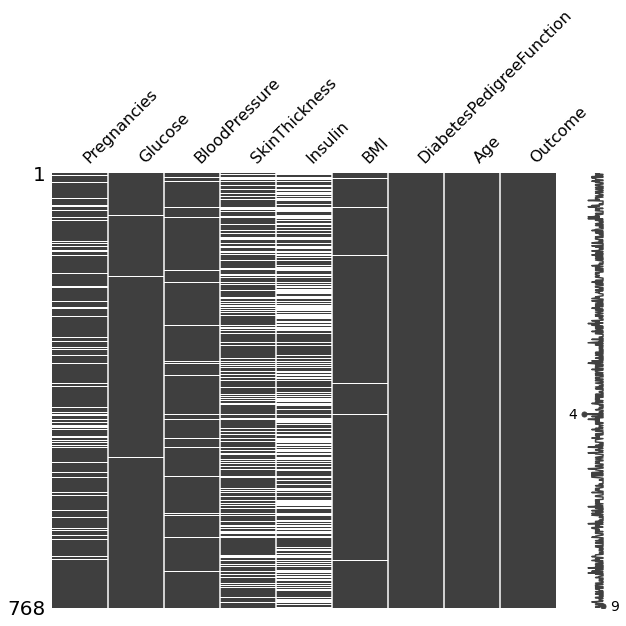

In [50]:
msno.matrix(data,figsize=(10,8))
plt.show()

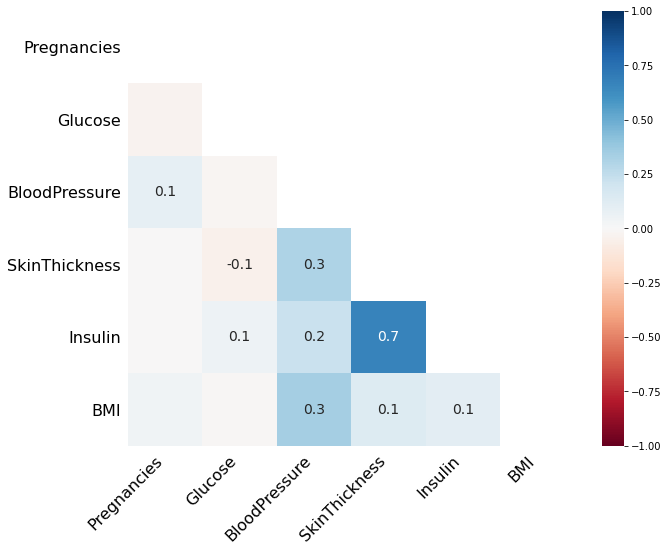

In [51]:
msno.heatmap(data,figsize=(10,8))
plt.show()

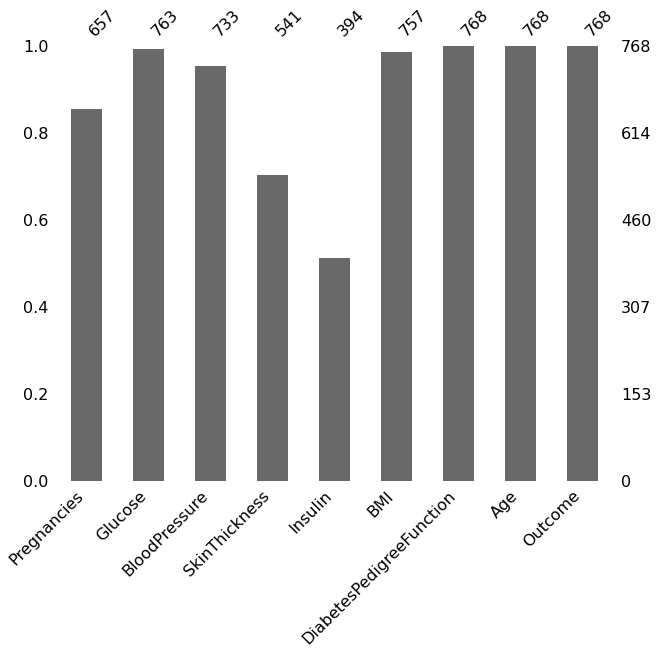

In [52]:
msno.bar(data,figsize=(10,8))
plt.show()

Let's add the class mean corresponding to that data instead of the NaN data.

In [72]:
print(data.groupby(["Outcome"])["Pregnancies"].median())
data["Pregnancies"].fillna(data.groupby(["Outcome"])["Pregnancies"].transform("median"),inplace=True)

Outcome
0    3.861827
1    5.669565
Name: Pregnancies, dtype: float64


In [73]:
print(data.groupby(["Outcome"])["Glucose"].median())
data["Glucose"].fillna(data.groupby(["Outcome"])["Glucose"].transform("median"),inplace=True)

Outcome
0    107.5
1    140.5
Name: Glucose, dtype: float64


In [74]:
print(data.groupby(["Outcome"])["BloodPressure"].median())
data["BloodPressure"].fillna(data.groupby(["Outcome"])["BloodPressure"].transform("median"),inplace=True)

Outcome
0    70.877339
1    75.321429
Name: BloodPressure, dtype: float64


In [75]:
print(data.groupby(["Outcome"])["SkinThickness"].median())
data["SkinThickness"].fillna(data.groupby(["Outcome"])["SkinThickness"].transform("median"),inplace=True)

Outcome
0    27.235457
1    33.000000
Name: SkinThickness, dtype: float64


In [76]:
print(data.groupby(["Outcome"])["Insulin"].median())
data["Insulin"].fillna(data.groupby(["Outcome"])["Insulin"].transform("median"),inplace=True)

Outcome
0    130.287879
1    206.846154
Name: Insulin, dtype: float64


In [77]:
print(data.groupby(["Outcome"])["BMI"].median())
data["BMI"].fillna(data.groupby(["Outcome"])["BMI"].transform("median"),inplace=True)

Outcome
0    30.4
1    34.3
Name: BMI, dtype: float64


In [78]:
print(data.isnull().sum()) # checking again missing values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [80]:
print(data.head(10)) # checking again data

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin        BMI  \
0     6.000000    148.0      72.000000      35.000000  206.846154  33.600000   
1     1.000000     85.0      66.000000      29.000000  130.287879  26.600000   
2     8.000000    183.0      64.000000      33.000000  206.846154  23.300000   
3     1.000000     89.0      66.000000      23.000000   94.000000  28.100000   
4     5.669565    137.0      40.000000      35.000000  168.000000  43.100000   
5     5.000000    116.0      74.000000      27.235457  130.287879  25.600000   
6     3.000000     78.0      50.000000      32.000000   88.000000  31.000000   
7    10.000000    115.0      70.877339      27.235457  130.287879  35.300000   
8     2.000000    197.0      70.000000      45.000000  543.000000  30.500000   
9     8.000000    125.0      96.000000      33.000000  206.846154  35.406767   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   3

# OUTLIER VALUES

In [81]:
DataForA = data.copy() # protect master copy data

In [82]:
clf = LocalOutlierFactor()
clf.fit_predict(DataForA)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [83]:
score = clf.negative_outlier_factor_
sortedscore = np.sort(score)
print(sortedscore) # checking outlier, look where the biggest jump took place
# 5.index is the place for this example

[-2.81676296 -2.59704432 -2.40766904 -2.22239697 -2.04359282 -1.9900791
 -1.94643604 -1.80498399 -1.79350859 -1.78543189 -1.76326905 -1.74763792
 -1.73617057 -1.71932481 -1.66579692 -1.65043927 -1.63738187 -1.61998032
 -1.59375651 -1.56160199 -1.56031871 -1.55908635 -1.55858426 -1.54846937
 -1.54827609 -1.5277167  -1.52614302 -1.50757155 -1.50709393 -1.49886133
 -1.49640622 -1.49441164 -1.47955212 -1.47786383 -1.47765718 -1.47646644
 -1.46578304 -1.46168616 -1.45605974 -1.45115994 -1.44570108 -1.43215585
 -1.4305232  -1.42791145 -1.41773348 -1.41733439 -1.41589597 -1.41473016
 -1.41364431 -1.40215282 -1.4020087  -1.39556347 -1.39371143 -1.39346095
 -1.39255631 -1.3855639  -1.38538598 -1.37947114 -1.37885412 -1.37548165
 -1.37214106 -1.37149435 -1.36758112 -1.36526982 -1.36469459 -1.36209707
 -1.35728437 -1.3559478  -1.35567249 -1.3509748  -1.34293448 -1.34258157
 -1.34180083 -1.34163291 -1.33586386 -1.33482612 -1.33463775 -1.33439033
 -1.33122472 -1.33057968 -1.32733642 -1.32366898 -1.

In [84]:
point = sortedscore[5]
print(point)
print(DataForA[score == point])

-1.9900790977219511
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
228          4.0    197.0           70.0           39.0    744.0  36.7   

     DiabetesPedigreeFunction  Age  Outcome  
228                     2.329   31        0  


In [88]:
outliers = DataForA < point
print(DataForA[outliers].value_counts().sum())
# it is not a problem for that data

0


# CORRELATION - NORMALITY - HOMOGENEITY

## Correlation

In [89]:
corrPearson = data.corr(method="pearson")
corrSpearman = data.corr(method="spearman")
# correlation types

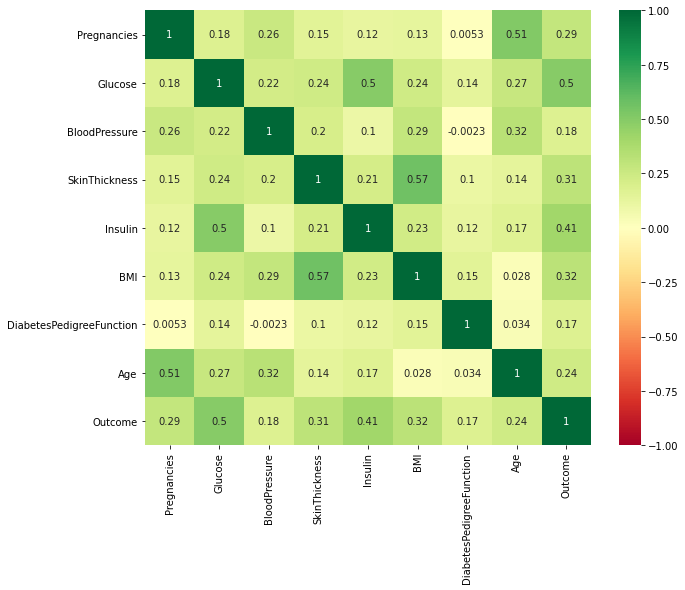

In [91]:
figure = plt.figure(figsize=(10,8))
sns.heatmap(corrPearson,cmap="RdYlGn",vmax=1,vmin=-1,center=0,annot=True)
plt.show()

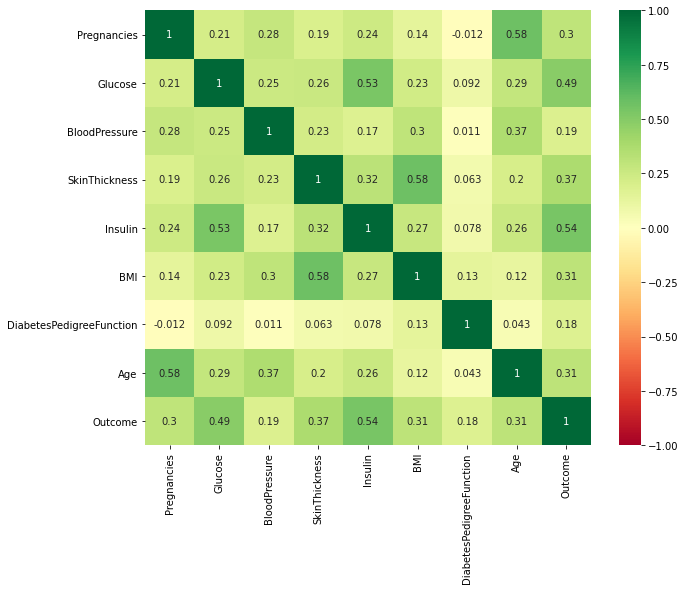

In [92]:
figure = plt.figure(figsize=(10,8))
sns.heatmap(corrSpearman,cmap="RdYlGn",vmax=1,vmin=-1,center=0,annot=True)
plt.show()

## Normality

In [93]:
for i in data.columns[0:8]:
    print("---"*30)
    print(i)
    print("%.3f - %.3f" % shapiro(data[i]))

------------------------------------------------------------------------------------------
Pregnancies
0.912 - 0.000
------------------------------------------------------------------------------------------
Glucose
0.970 - 0.000
------------------------------------------------------------------------------------------
BloodPressure
0.989 - 0.000
------------------------------------------------------------------------------------------
SkinThickness
0.953 - 0.000
------------------------------------------------------------------------------------------
Insulin
0.778 - 0.000
------------------------------------------------------------------------------------------
BMI
0.979 - 0.000
------------------------------------------------------------------------------------------
DiabetesPedigreeFunction
0.837 - 0.000
------------------------------------------------------------------------------------------
Age
0.875 - 0.000


## Homogeneity

In [96]:
print("%.3f - %.3f" % levene(data["Pregnancies"],data["Glucose"],data["BloodPressure"],
                            data["SkinThickness"],data["Insulin"],data["BMI"],
                            data["DiabetesPedigreeFunction"],data["Age"]))

312.431 - 0.000


# VISUALIZATION

### BASIC HIST

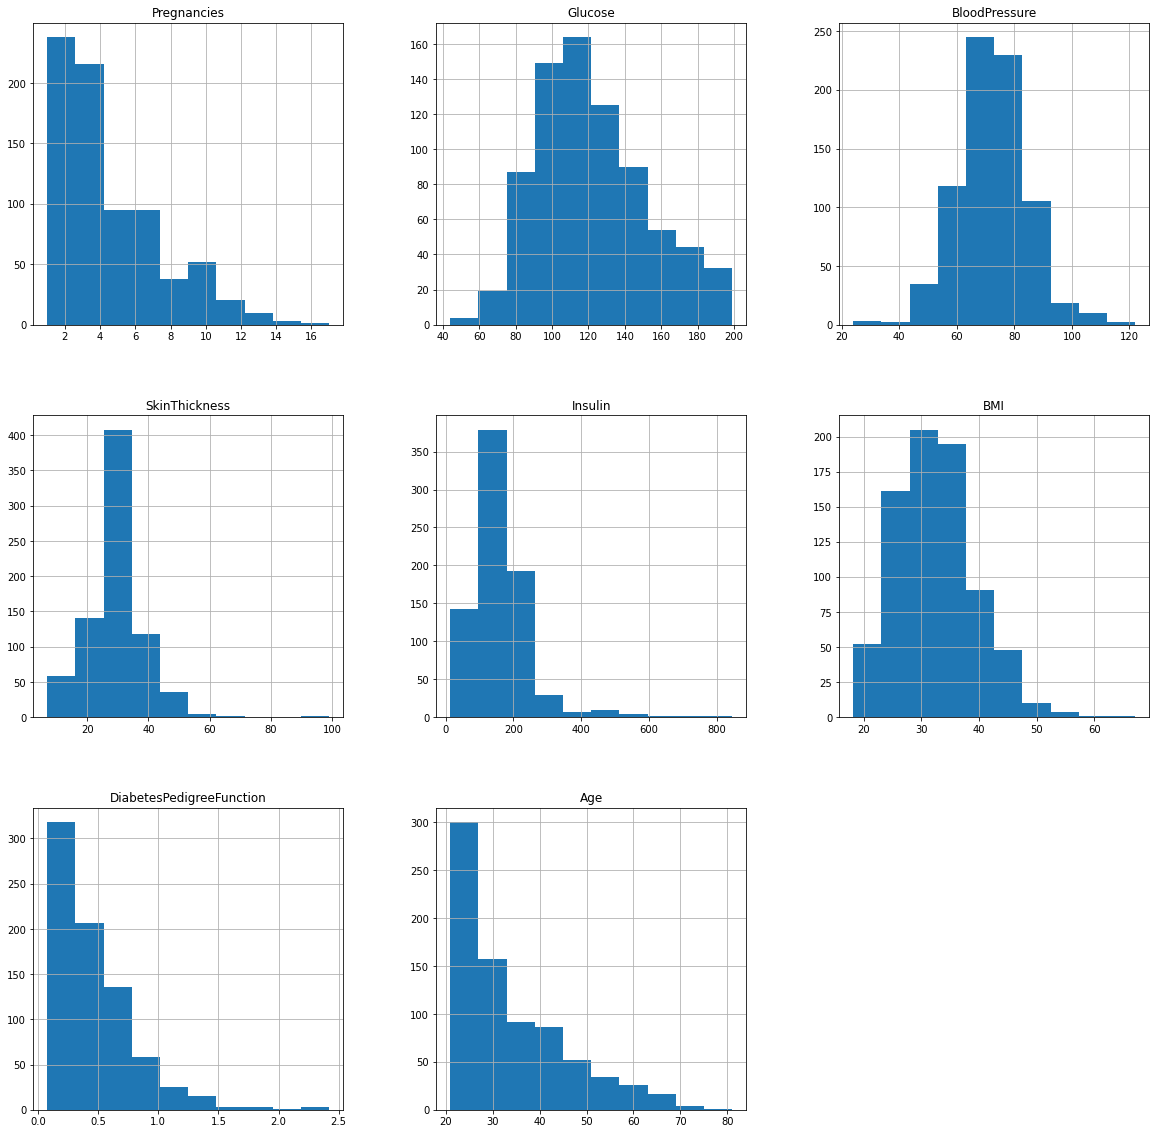

In [101]:
data.iloc[:,0:8].hist(figsize=(20,20))
plt.show()

 ### BOX

In [103]:
dataV = data.copy()
dataV["Outcome"] = pd.Categorical(dataV["Outcome"])

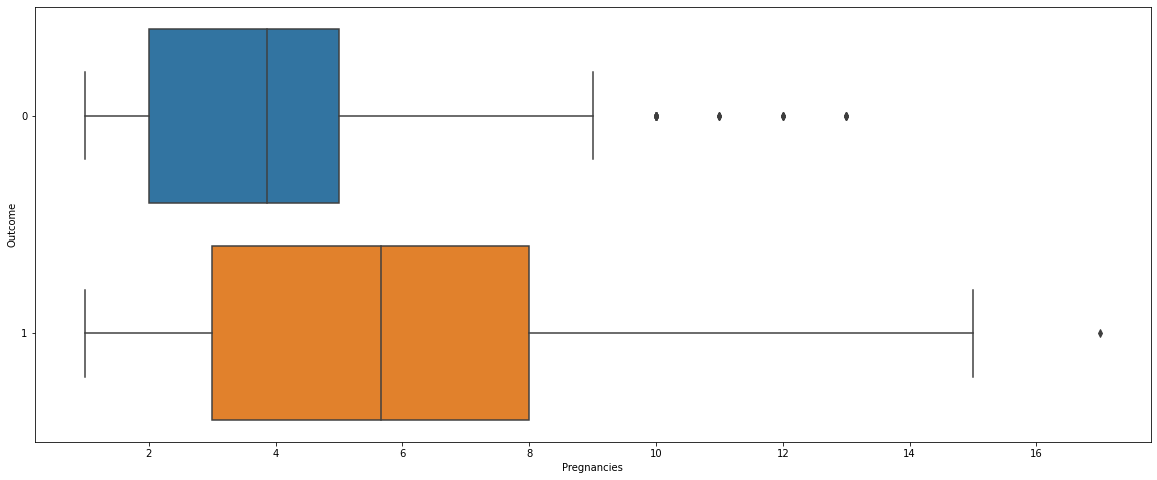

In [104]:
figure = plt.figure(figsize=(20,8))
sns.boxplot(x="Pregnancies",y="Outcome",data=dataV)
plt.show()

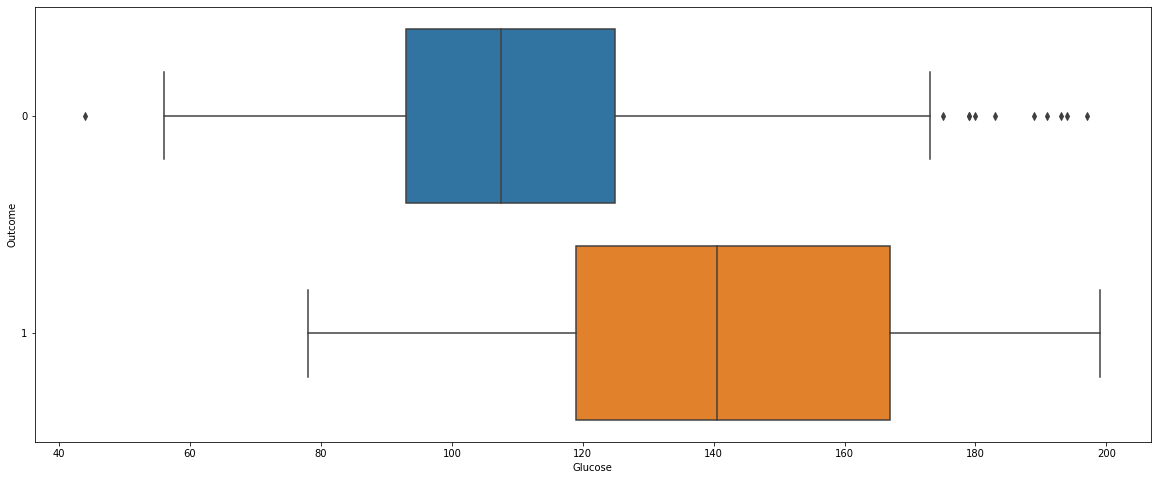

In [105]:
figure = plt.figure(figsize=(20,8))
sns.boxplot(x="Glucose",y="Outcome",data=dataV)
plt.show()

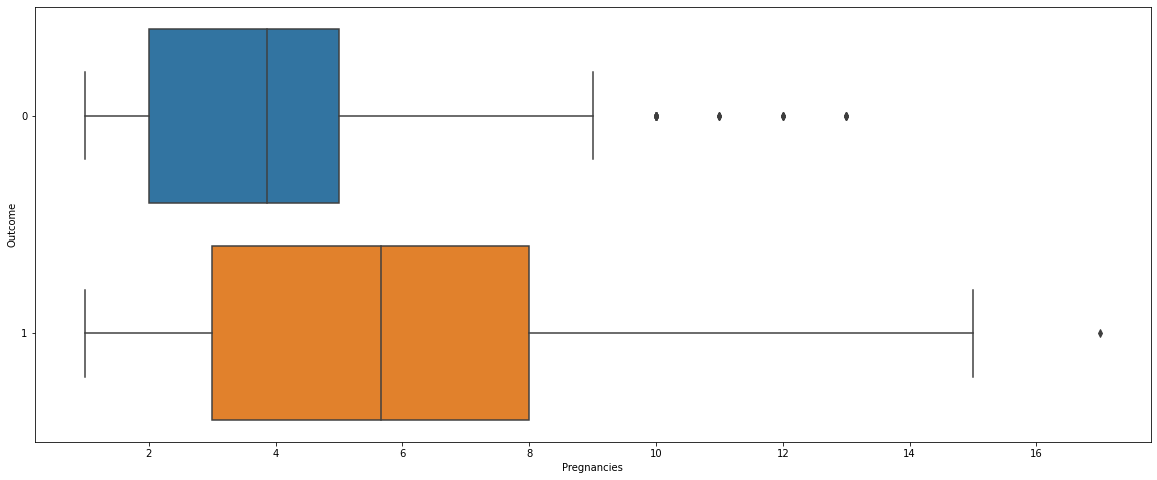

In [106]:
figure = plt.figure(figsize=(20,8))
sns.boxplot(x="Pregnancies",y="Outcome",data=dataV)
plt.show()

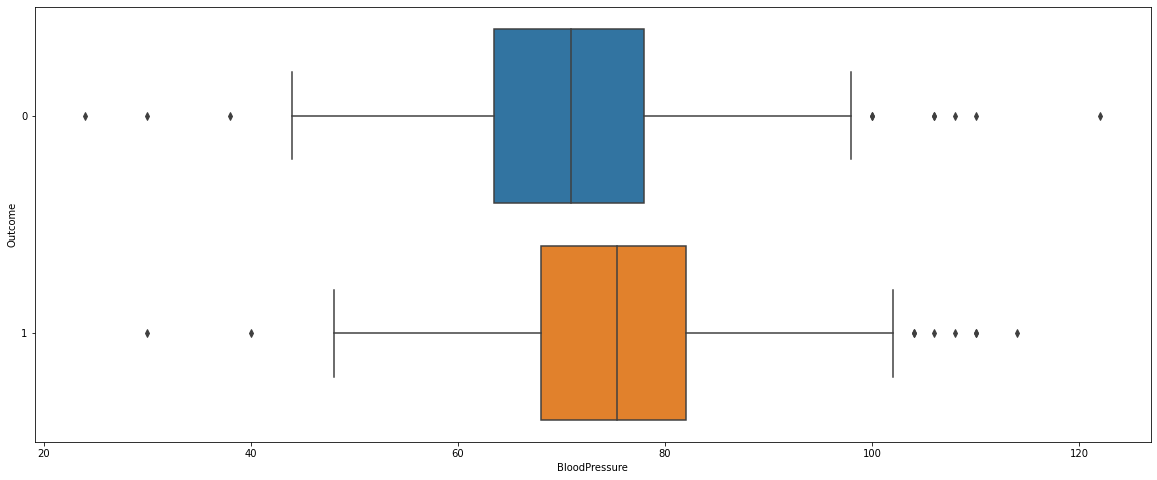

In [107]:
figure = plt.figure(figsize=(20,8))
sns.boxplot(x="BloodPressure",y="Outcome",data=dataV)
plt.show()

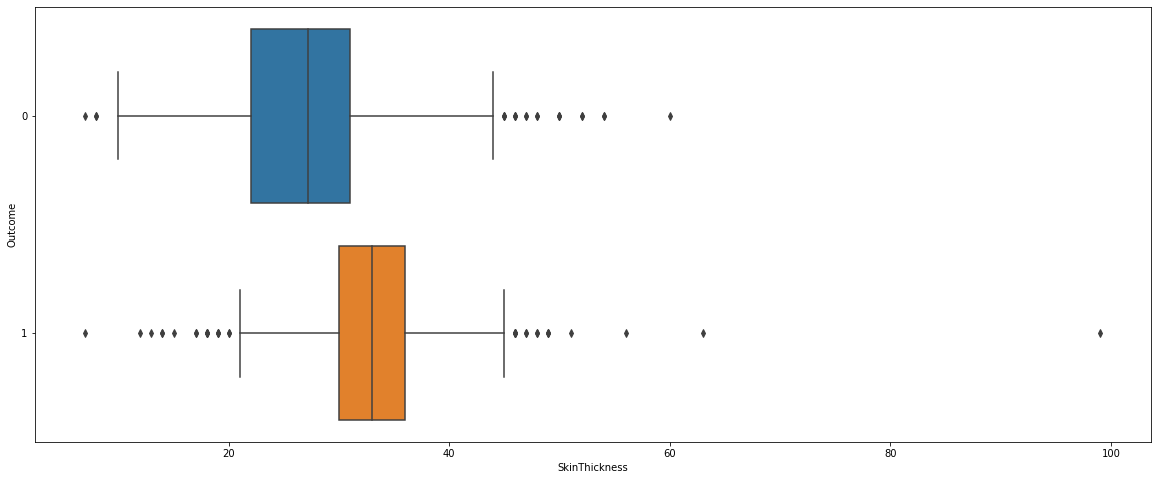

In [108]:
figure = plt.figure(figsize=(20,8))
sns.boxplot(x="SkinThickness",y="Outcome",data=dataV)
plt.show()

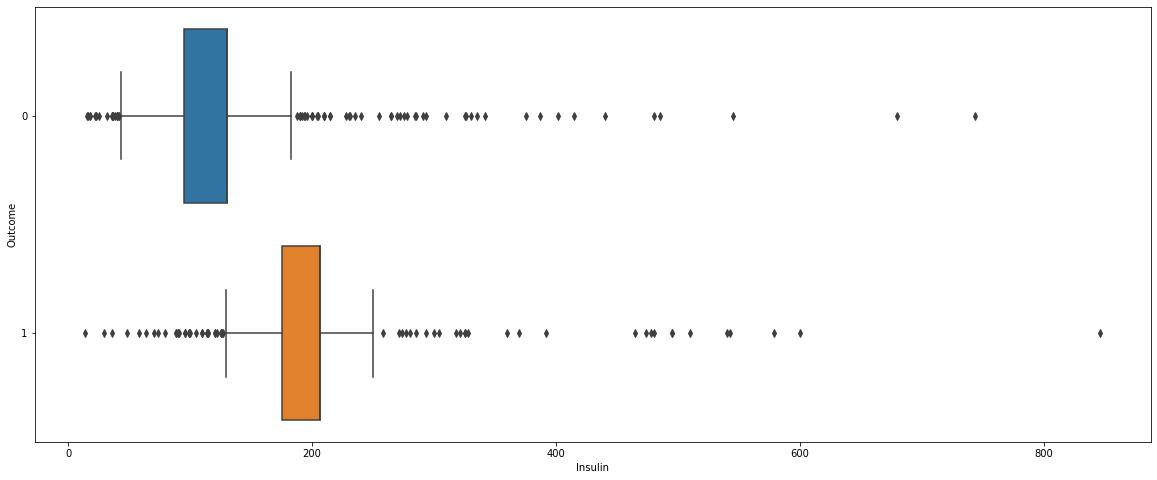

In [109]:
figure = plt.figure(figsize=(20,8))
sns.boxplot(x="Insulin",y="Outcome",data=dataV)
plt.show()

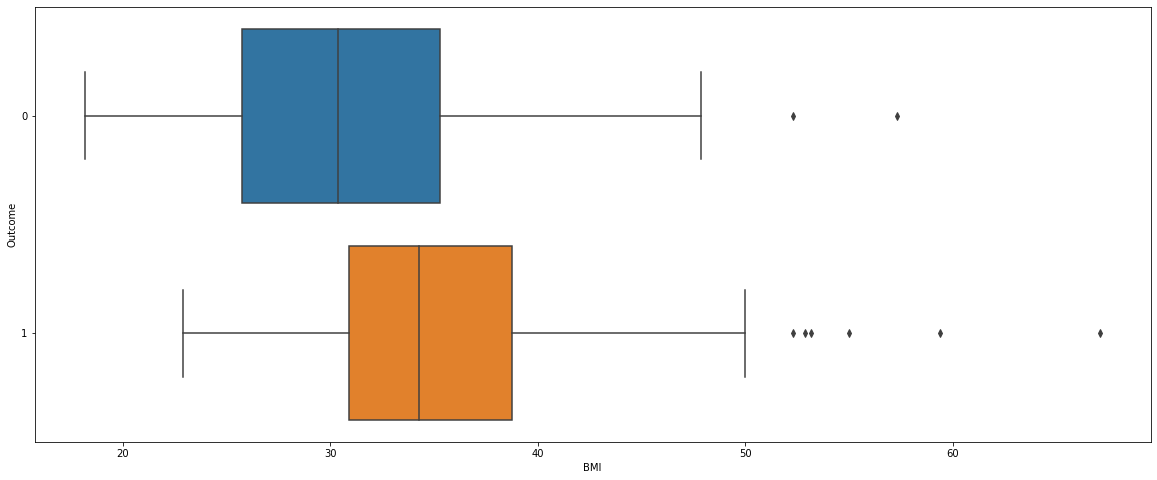

In [110]:
figure = plt.figure(figsize=(20,8))
sns.boxplot(x="BMI",y="Outcome",data=dataV)
plt.show()

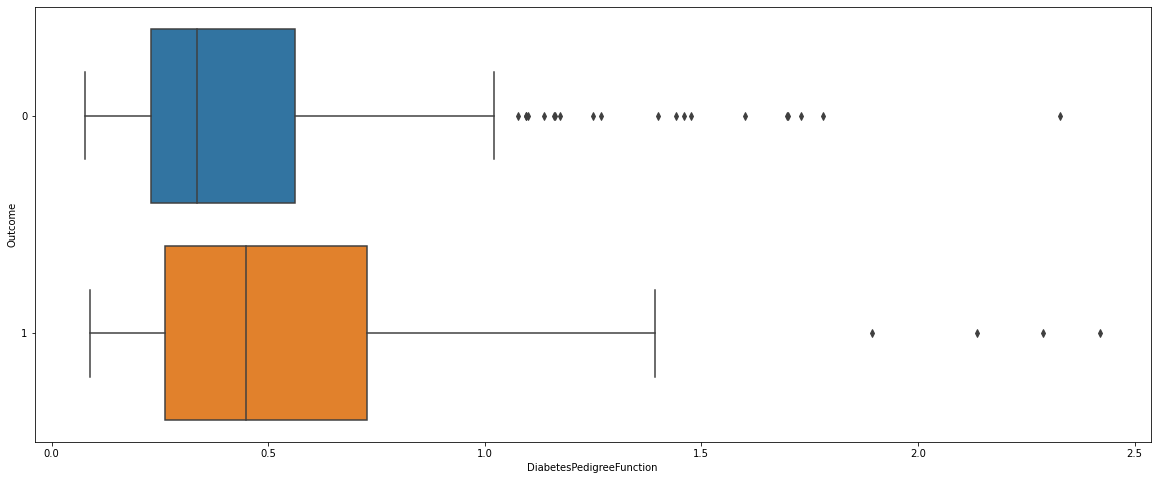

In [111]:
figure = plt.figure(figsize=(20,8))
sns.boxplot(x="DiabetesPedigreeFunction",y="Outcome",data=dataV)
plt.show()

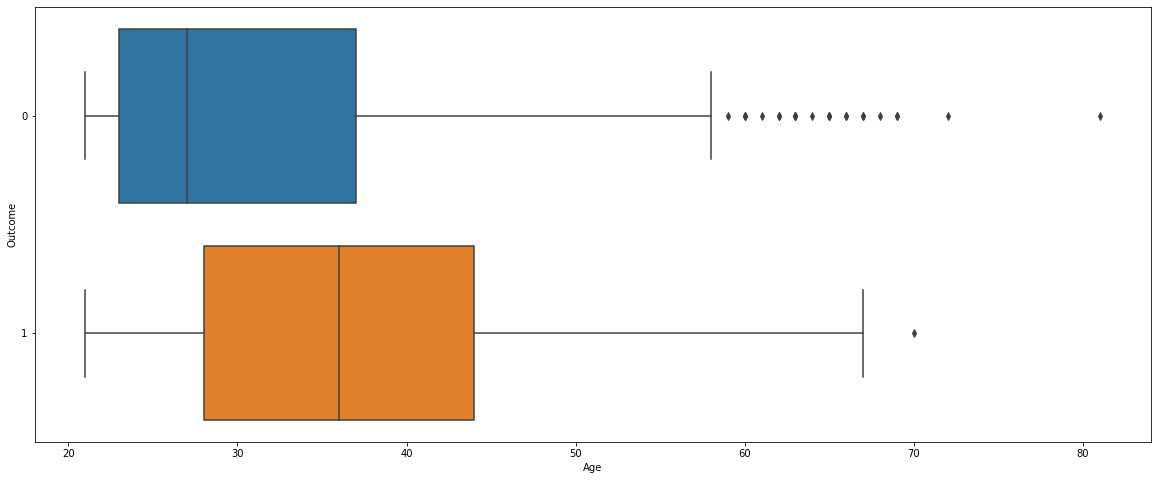

In [112]:
figure = plt.figure(figsize=(20,8))
sns.boxplot(x="Age",y="Outcome",data=dataV)
plt.show()

### LINE

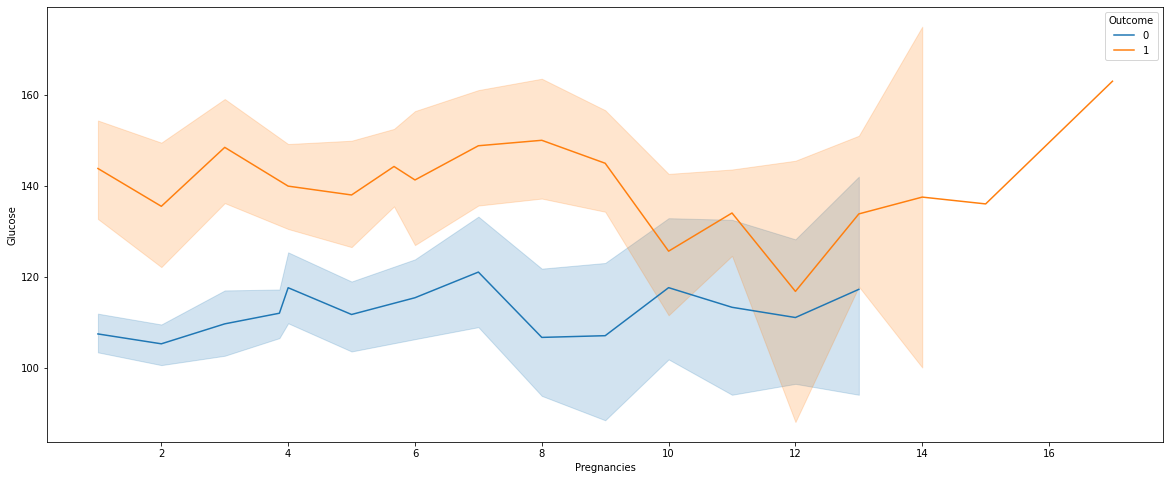

In [115]:
figure = plt.figure(figsize=(20,8))
sns.lineplot(x="Pregnancies",y="Glucose",hue="Outcome",data=dataV)
plt.show()

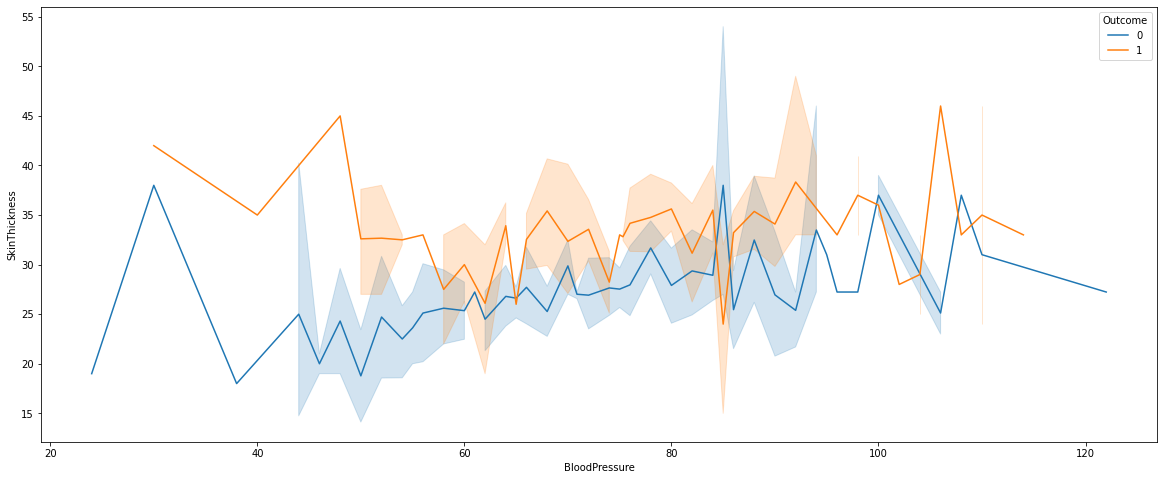

In [116]:
figure = plt.figure(figsize=(20,8))
sns.lineplot(x="BloodPressure",y="SkinThickness",hue="Outcome",data=dataV)
plt.show()

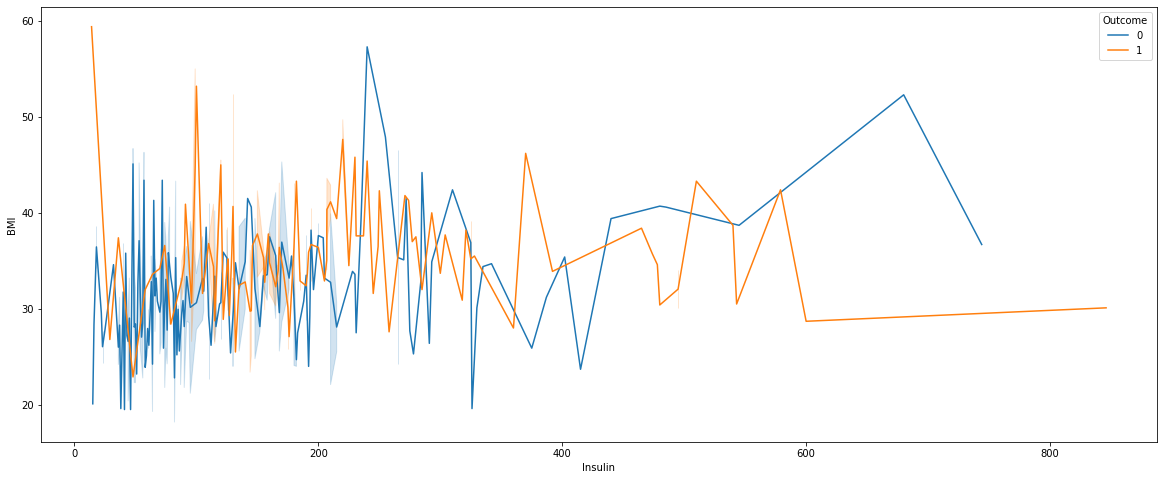

In [117]:
figure = plt.figure(figsize=(20,8))
sns.lineplot(x="Insulin",y="BMI",hue="Outcome",data=dataV)
plt.show()

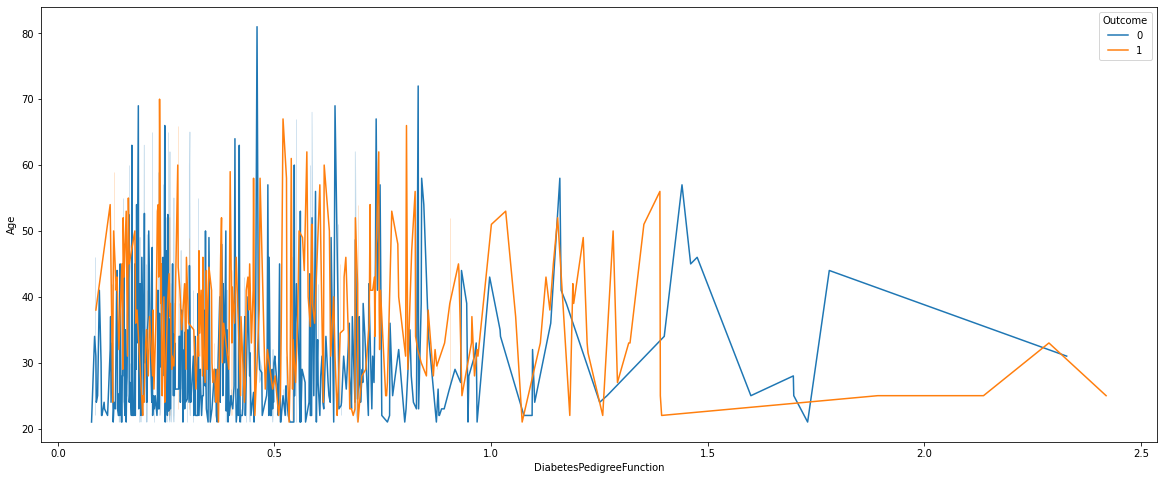

In [118]:
figure = plt.figure(figsize=(20,8))
sns.lineplot(x="DiabetesPedigreeFunction",y="Age",hue="Outcome",data=dataV)
plt.show()

### HISTPLOT

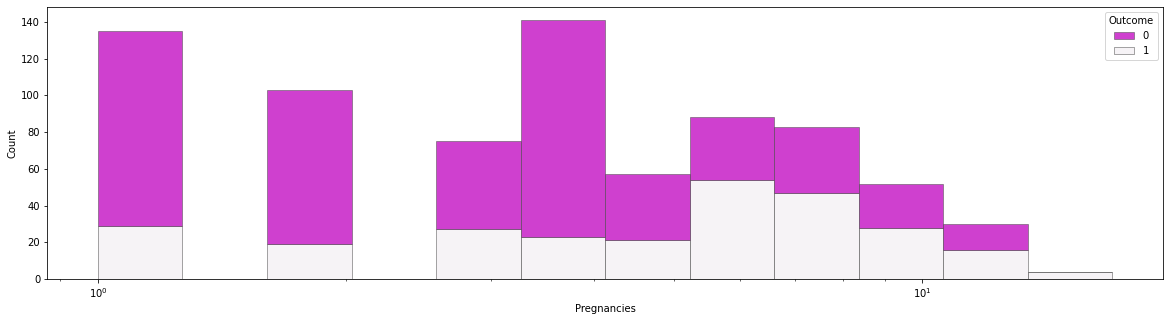

In [122]:
figure = plt.figure(figsize=(20,5))
sns.histplot(
    data,
    x="Pregnancies", hue="Outcome",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
plt.show()

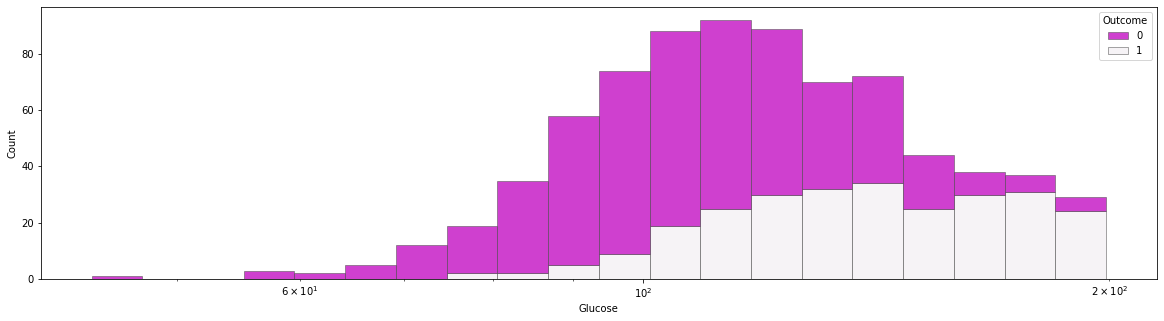

In [123]:
figure = plt.figure(figsize=(20,5))
sns.histplot(
    data,
    x="Glucose", hue="Outcome",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
plt.show()

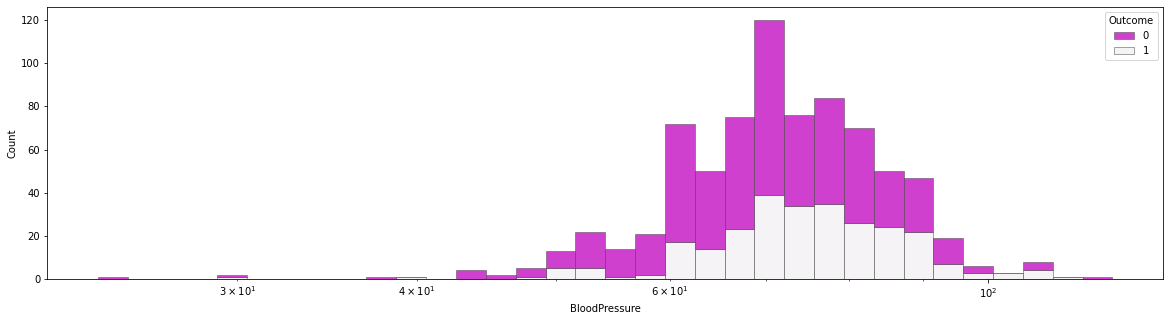

In [124]:
figure = plt.figure(figsize=(20,5))
sns.histplot(
    data,
    x="BloodPressure", hue="Outcome",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
plt.show()

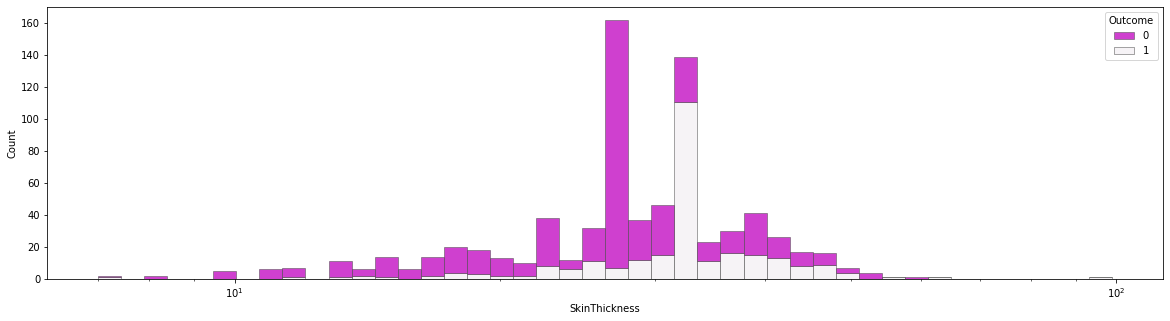

In [125]:
figure = plt.figure(figsize=(20,5))
sns.histplot(
    data,
    x="SkinThickness", hue="Outcome",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
plt.show()

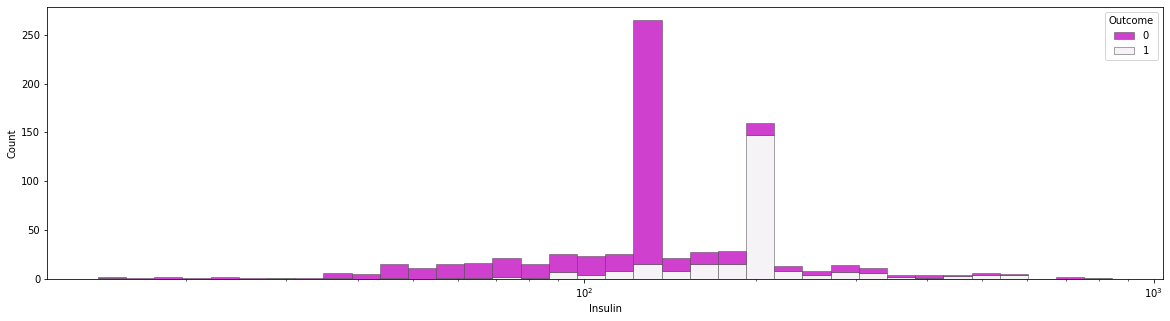

In [126]:
figure = plt.figure(figsize=(20,5))
sns.histplot(
    data,
    x="Insulin", hue="Outcome",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
plt.show()

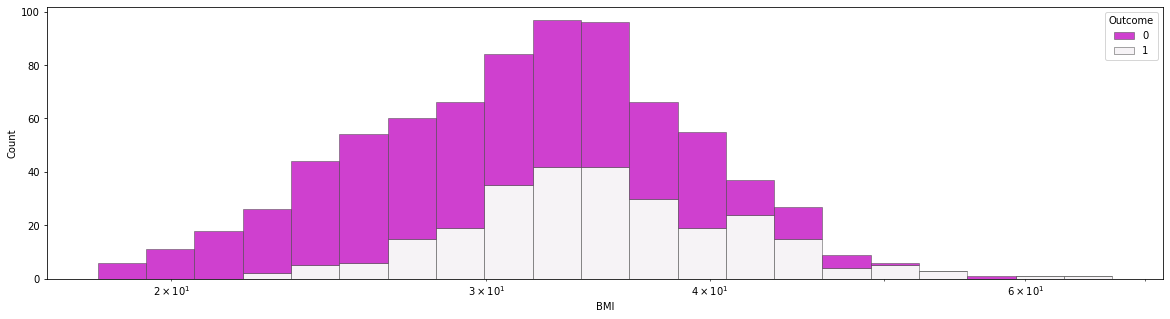

In [127]:
figure = plt.figure(figsize=(20,5))
sns.histplot(
    data,
    x="BMI", hue="Outcome",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
plt.show()

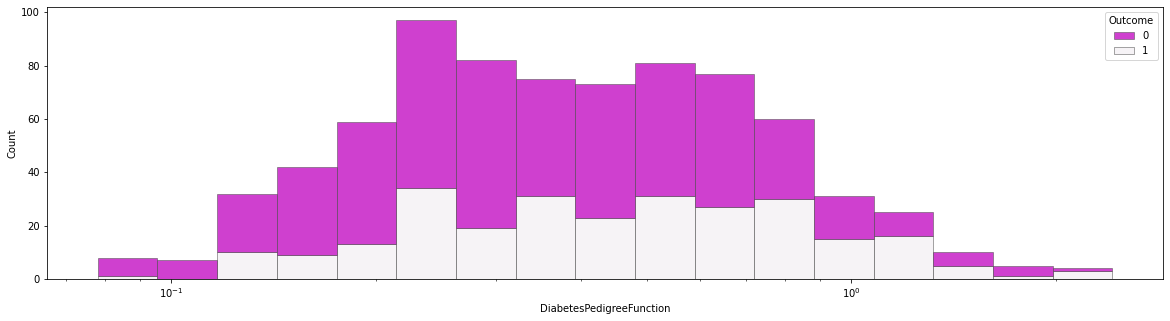

In [128]:
figure = plt.figure(figsize=(20,5))
sns.histplot(
    data,
    x="DiabetesPedigreeFunction", hue="Outcome",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
plt.show()

### JOINTPLOT

<Figure size 1440x576 with 0 Axes>

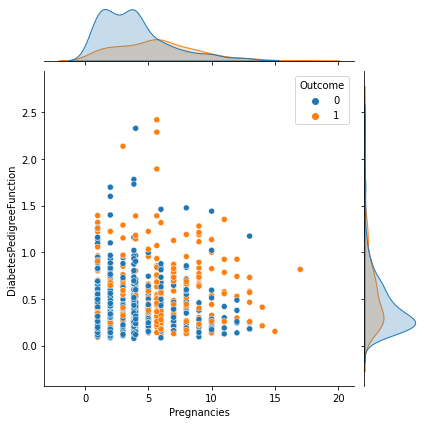

In [129]:
figure = plt.figure(figsize=(20,8))
sns.jointplot(x="Pregnancies",y="DiabetesPedigreeFunction", color="#4CB391",hue="Outcome",data=data)
plt.show()

<Figure size 1440x576 with 0 Axes>

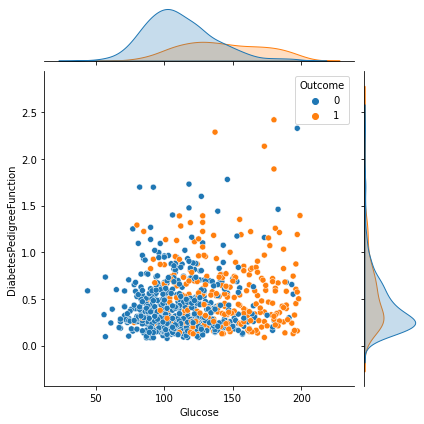

In [130]:
figure = plt.figure(figsize=(20,8))
sns.jointplot(x="Glucose",y="DiabetesPedigreeFunction", color="#4CB391",hue="Outcome",data=data)
plt.show()

<Figure size 1440x576 with 0 Axes>

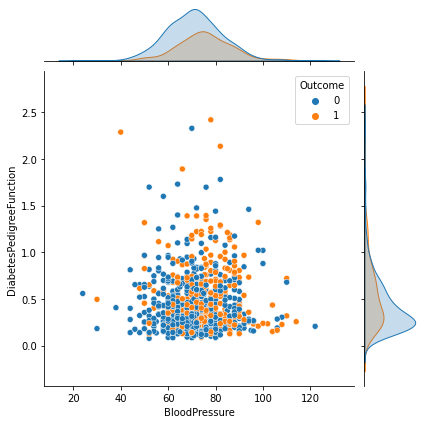

In [131]:
figure = plt.figure(figsize=(20,8))
sns.jointplot(x="BloodPressure",y="DiabetesPedigreeFunction", color="#4CB391",hue="Outcome",data=data)
plt.show()

<Figure size 1440x576 with 0 Axes>

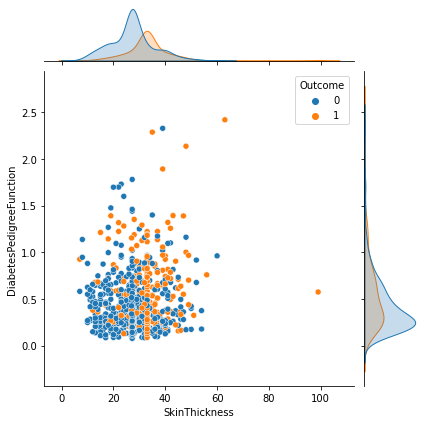

In [132]:
figure = plt.figure(figsize=(20,8))
sns.jointplot(x="SkinThickness",y="DiabetesPedigreeFunction", color="#4CB391",hue="Outcome",data=data)
plt.show()

<Figure size 1440x576 with 0 Axes>

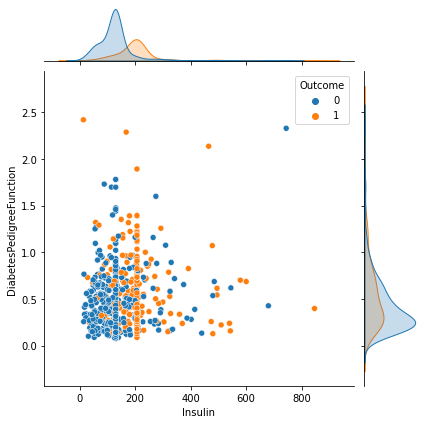

In [133]:
figure = plt.figure(figsize=(20,8))
sns.jointplot(x="Insulin",y="DiabetesPedigreeFunction", color="#4CB391",hue="Outcome",data=data)
plt.show()

<Figure size 1440x576 with 0 Axes>

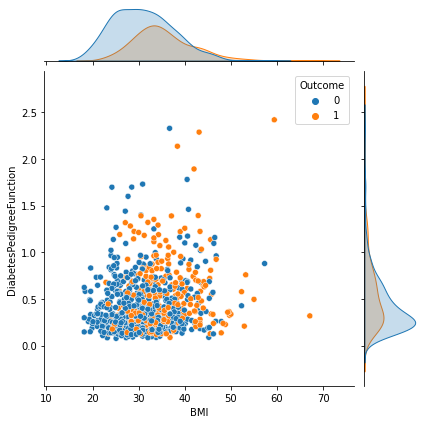

In [134]:
figure = plt.figure(figsize=(20,8))
sns.jointplot(x="BMI",y="DiabetesPedigreeFunction", color="#4CB391",hue="Outcome",data=data)
plt.show()

### DISTPLOT

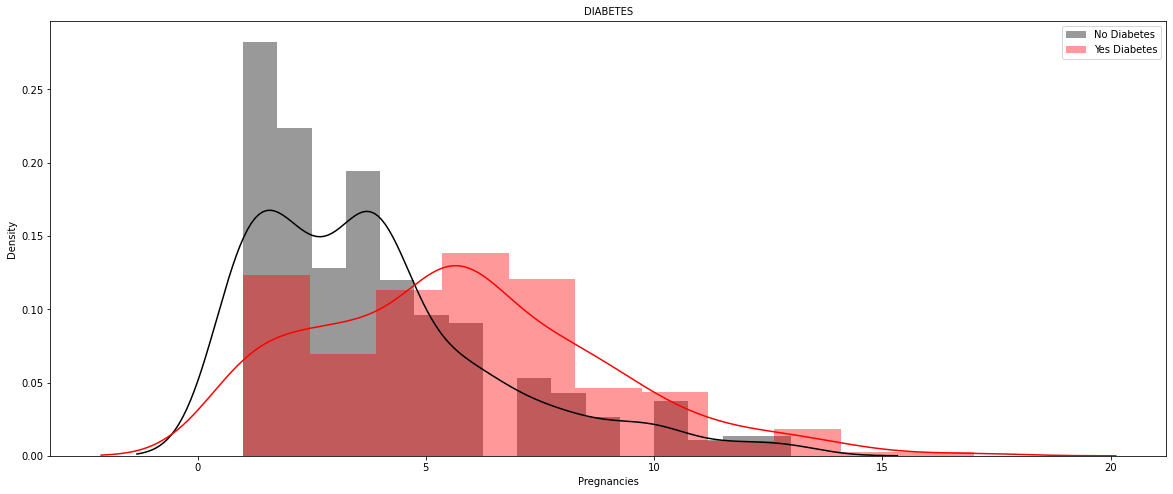

In [140]:
figure = plt.figure(figsize=(20,8))
sns.distplot(data[data['Outcome'] == 0]["Pregnancies"], color='black',label='No Diabetes') 
sns.distplot(data[data['Outcome'] == 1]["Pregnancies"], color='red',label='Yes Diabetes') #Red for heart disease
plt.title('DIABETES', fontsize=10)
plt.legend()

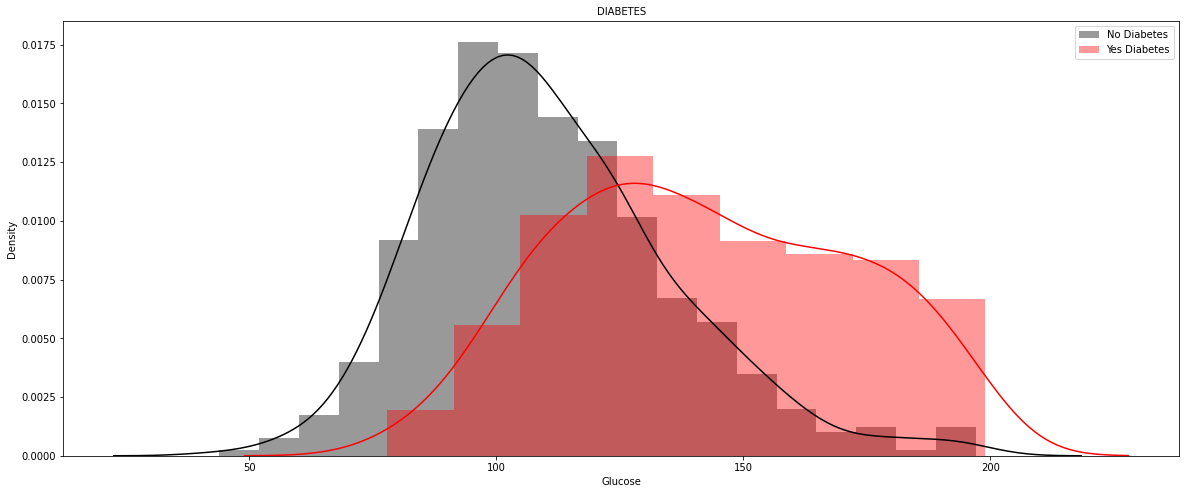

In [142]:
figure = plt.figure(figsize=(20,8))
sns.distplot(data[data['Outcome'] == 0]["Glucose"], color='black',label='No Diabetes') 
sns.distplot(data[data['Outcome'] == 1]["Glucose"], color='red',label='Yes Diabetes') #Red for heart disease
plt.title('DIABETES', fontsize=10)
plt.legend()

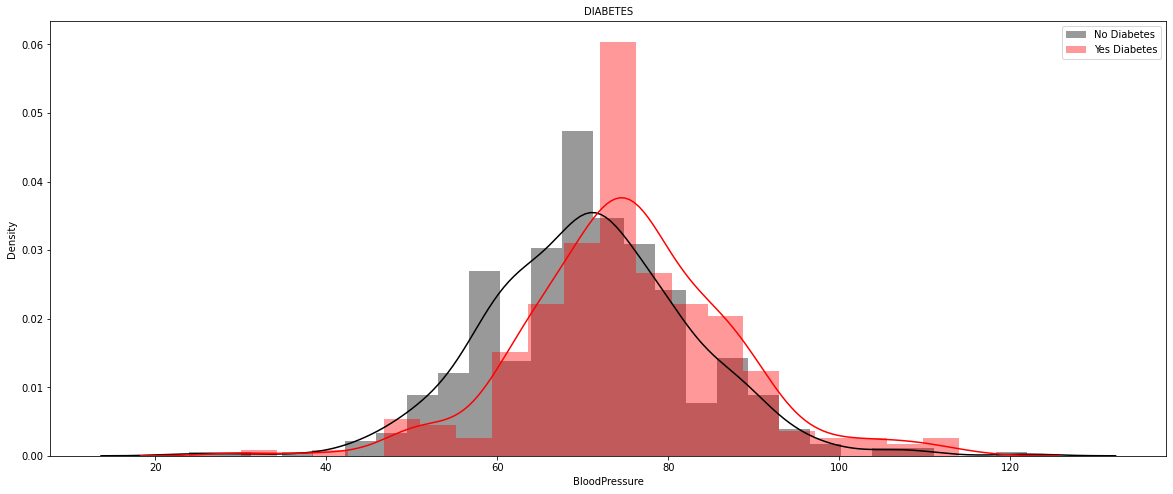

In [143]:
figure = plt.figure(figsize=(20,8))
sns.distplot(data[data['Outcome'] == 0]["BloodPressure"], color='black',label='No Diabetes') 
sns.distplot(data[data['Outcome'] == 1]["BloodPressure"], color='red',label='Yes Diabetes') #Red for heart disease
plt.title('DIABETES', fontsize=10)
plt.legend()

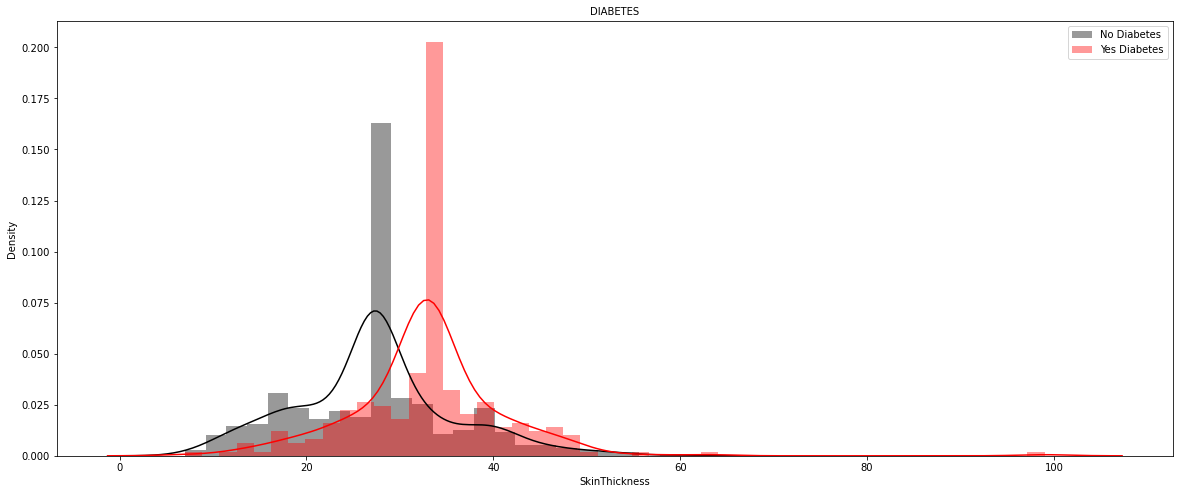

In [144]:
figure = plt.figure(figsize=(20,8))
sns.distplot(data[data['Outcome'] == 0]["SkinThickness"], color='black',label='No Diabetes') 
sns.distplot(data[data['Outcome'] == 1]["SkinThickness"], color='red',label='Yes Diabetes') #Red for heart disease
plt.title('DIABETES', fontsize=10)
plt.legend()

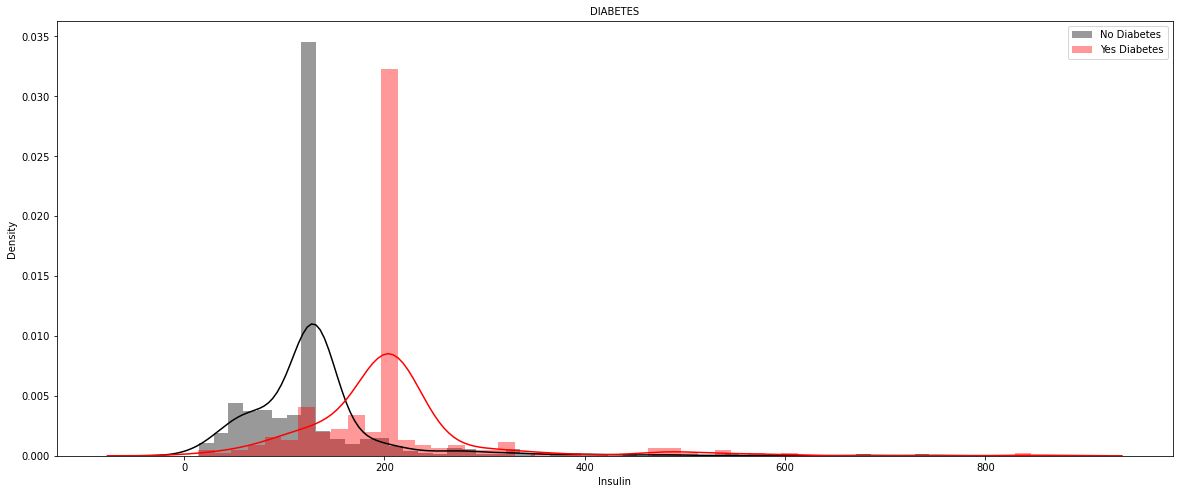

In [145]:
figure = plt.figure(figsize=(20,8))
sns.distplot(data[data['Outcome'] == 0]["Insulin"], color='black',label='No Diabetes') 
sns.distplot(data[data['Outcome'] == 1]["Insulin"], color='red',label='Yes Diabetes') #Red for heart disease
plt.title('DIABETES', fontsize=10)
plt.legend()

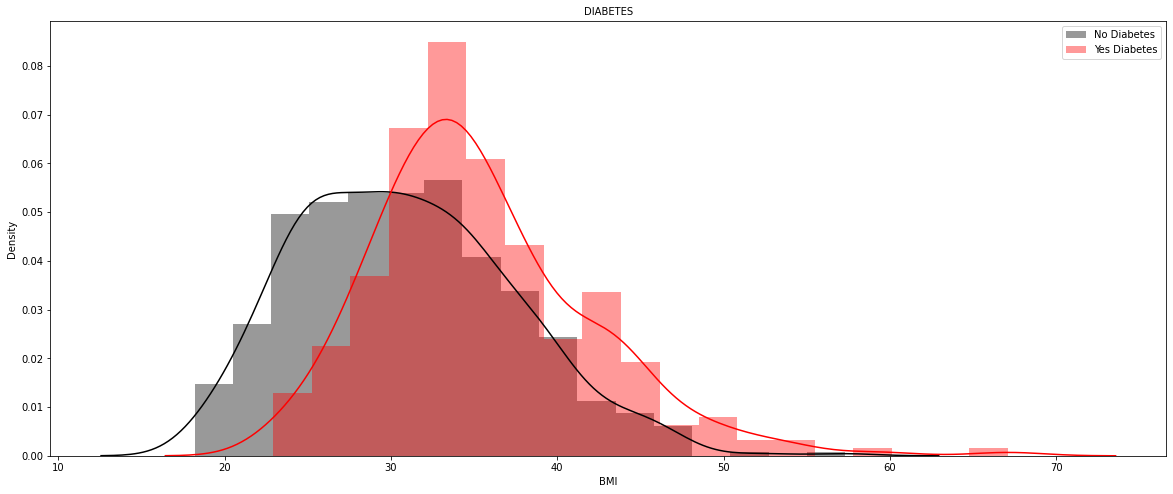

In [146]:
figure = plt.figure(figsize=(20,8))
sns.distplot(data[data['Outcome'] == 0]["BMI"], color='black',label='No Diabetes') 
sns.distplot(data[data['Outcome'] == 1]["BMI"], color='red',label='Yes Diabetes') #Red for heart disease
plt.title('DIABETES', fontsize=10)
plt.legend()

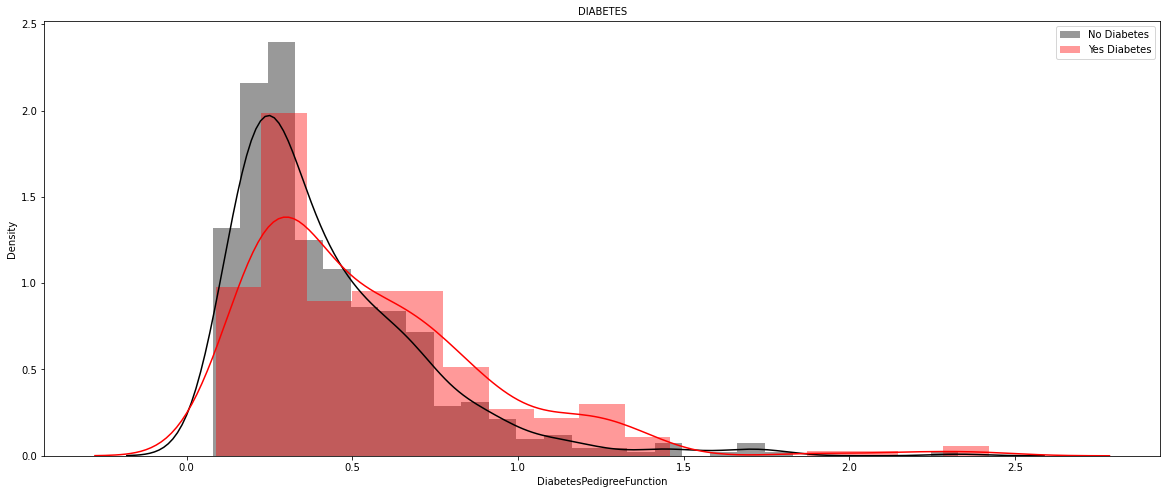

In [147]:
figure = plt.figure(figsize=(20,8))
sns.distplot(data[data['Outcome'] == 0]["DiabetesPedigreeFunction"], color='black',label='No Diabetes') 
sns.distplot(data[data['Outcome'] == 1]["DiabetesPedigreeFunction"], color='red',label='Yes Diabetes') #Red for heart disease
plt.title('DIABETES', fontsize=10)
plt.legend()

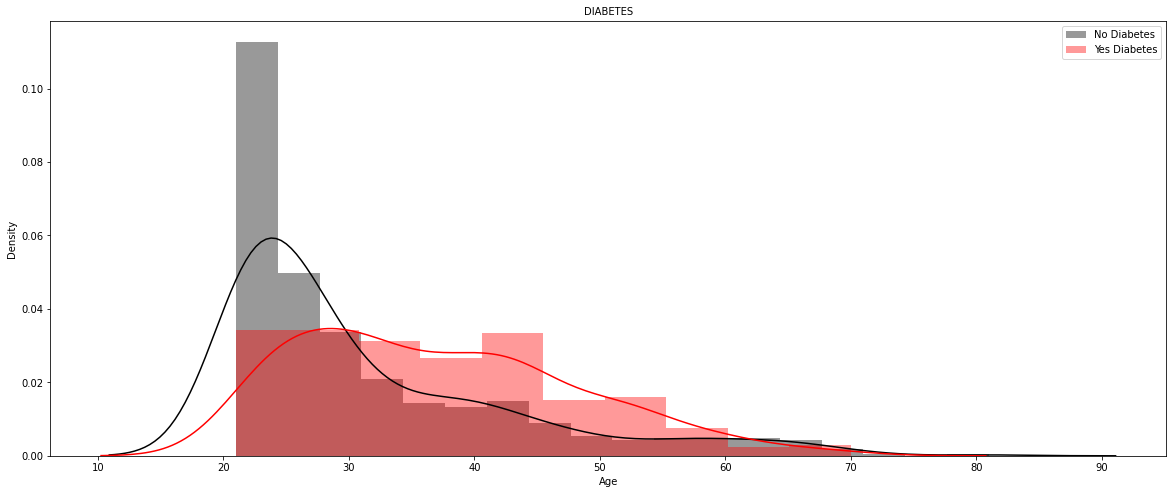

In [148]:
figure = plt.figure(figsize=(20,8))
sns.distplot(data[data['Outcome'] == 0]["Age"], color='black',label='No Diabetes') 
sns.distplot(data[data['Outcome'] == 1]["Age"], color='red',label='Yes Diabetes') #Red for heart disease
plt.title('DIABETES', fontsize=10)
plt.legend()

### JOINTGRID

<Figure size 1440x576 with 0 Axes>

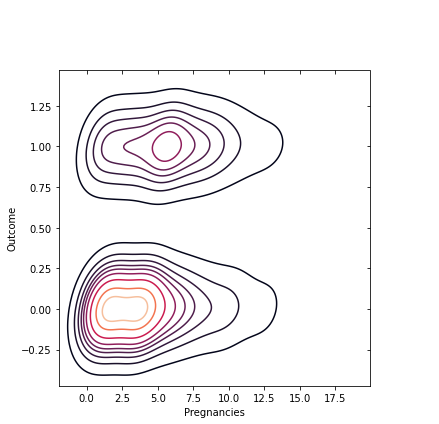

In [149]:
figure = plt.figure(figsize=(20,8))
g = sns.JointGrid(data=data, x="Pregnancies", y="Outcome", space=0)
g.plot_joint(sns.kdeplot,cmap="rocket")
plt.show()

<Figure size 1440x576 with 0 Axes>

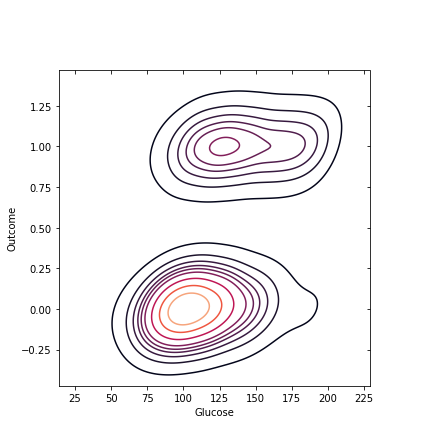

In [150]:
figure = plt.figure(figsize=(20,8))
g = sns.JointGrid(data=data, x="Glucose", y="Outcome", space=0)
g.plot_joint(sns.kdeplot,cmap="rocket")
plt.show()

<Figure size 1440x576 with 0 Axes>

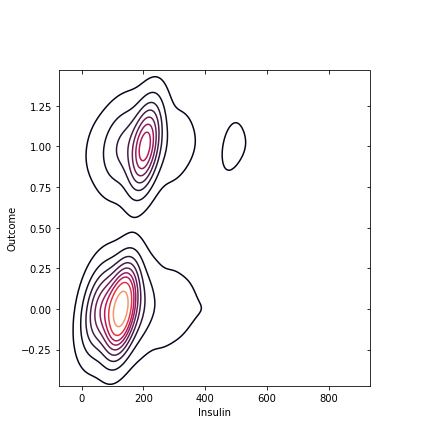

In [151]:
figure = plt.figure(figsize=(20,8))
g = sns.JointGrid(data=data, x="Insulin", y="Outcome", space=0)
g.plot_joint(sns.kdeplot,cmap="rocket")
plt.show()

### 3D CHA.

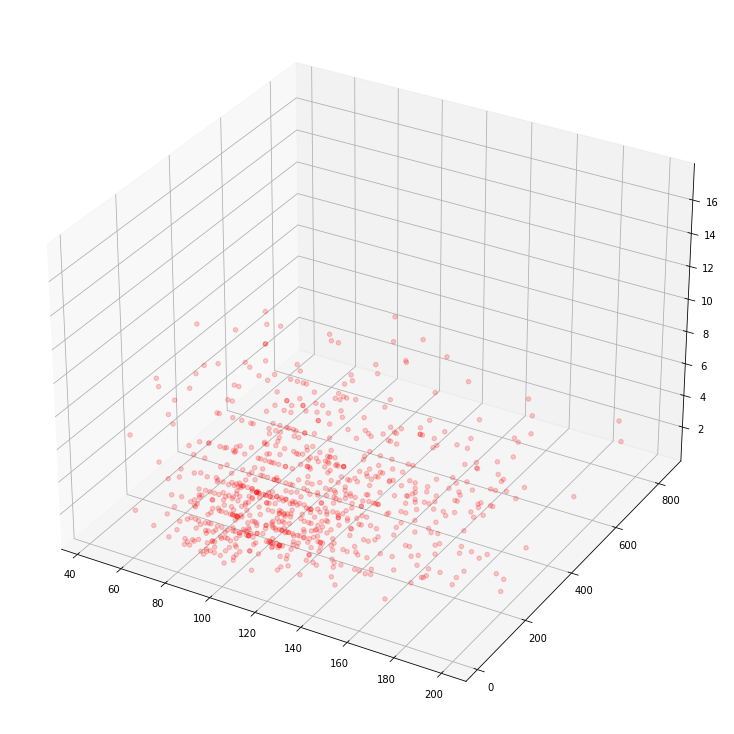

In [152]:
fig = plt.figure(figsize=(20,10))
ax = Axes3D(fig)
ax.scatter(data["Glucose"], data["Insulin"], data["Pregnancies"], c="red", s=20, alpha=0.2)
plt.show()

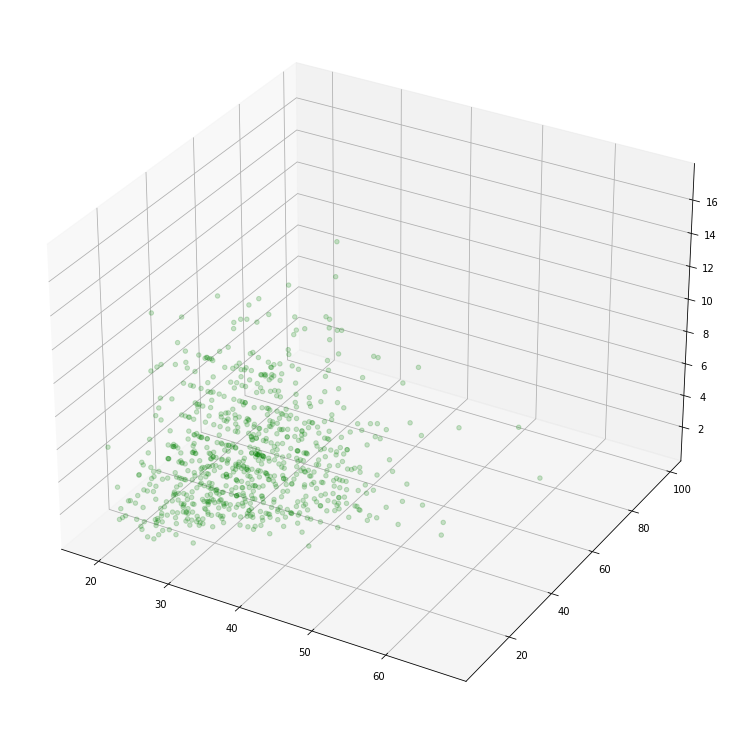

In [153]:
fig = plt.figure(figsize=(20,10))
ax = Axes3D(fig)
ax.scatter(data["BMI"], data["SkinThickness"], data["Pregnancies"] ,c="green", s=20, alpha=0.2)
plt.show()

# MODEL PROCESS FOR CLASS CLASSIFICATION

### Dependent and Independent Variables ( X & Y )

In [184]:
x = data.drop("Outcome",axis=1)
y = data["Outcome"]

xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.2,random_state=42)

### Classification Models

In [155]:
lj = LogisticRegression(solver="liblinear").fit(xTrain,yTrain)
gnb = GaussianNB().fit(xTrain,yTrain)
knnc = KNeighborsClassifier().fit(xTrain,yTrain)
cartc = DecisionTreeClassifier(random_state=42).fit(xTrain,yTrain)
rfc = RandomForestClassifier(random_state=42,verbose=False).fit(xTrain,yTrain)
gbmc = GradientBoostingClassifier(verbose=False).fit(xTrain,yTrain)
xgbc = XGBClassifier().fit(xTrain,yTrain)
lgbmc = LGBMClassifier().fit(xTrain,yTrain)
catbc = CatBoostClassifier(verbose=False).fit(xTrain,yTrain)

[12:31:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [156]:
modelsc = [lj,gnb,knnc,cartc,rfc,gbmc,xgbc,lgbmc,catbc]
# models for comparison

In [157]:
# comparison
for model in modelsc:
    name = model.__class__.__name__
    predict = model.predict(xTest)
    R2CV = cross_val_score(model,xTest,yTest,cv=10,verbose=False).mean()
    error = -cross_val_score(model,xTest,yTest,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()
    roc = roc_curve(yTest,predict)
    print(name + ": ")
    print("-" * 10)
    print("ACC-->",accuracy_score(yTest,predict))
    print("R2CV-->",R2CV)
    print("MEAN SQUARED ERROR-->",np.sqrt(error))
    print("ROC-->",roc)
    print("-" * 30)

LogisticRegression: 
----------
ACC--> 0.8246753246753247
R2CV--> 0.8245833333333333
MEAN SQUARED ERROR--> 0.4188277291043021
ROC--> (array([0.       , 0.1010101, 1.       ]), array([0.        , 0.69090909, 1.        ]), array([2, 1, 0]))
------------------------------
GaussianNB: 
----------
ACC--> 0.7922077922077922
R2CV--> 0.8116666666666668
MEAN SQUARED ERROR--> 0.4339738855430512
ROC--> (array([0.        , 0.19191919, 1.        ]), array([0.        , 0.76363636, 1.        ]), array([2, 1, 0]))
------------------------------
KNeighborsClassifier: 
----------
ACC--> 0.8376623376623377
R2CV--> 0.8708333333333333
MEAN SQUARED ERROR--> 0.3593976442141304
ROC--> (array([0.        , 0.12121212, 1.        ]), array([0.        , 0.76363636, 1.        ]), array([2, 1, 0]))
------------------------------
DecisionTreeClassifier: 
----------
ACC--> 0.8376623376623377
R2CV--> 0.8241666666666667
MEAN SQUARED ERROR--> 0.41932485418030413
ROC--> (array([0.        , 0.17171717, 1.        ]), array(

Best is RandomForestClassifier -- > 0.9029166666666667 / %90 Accuracy

[12:35:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:35:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:35:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:35:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

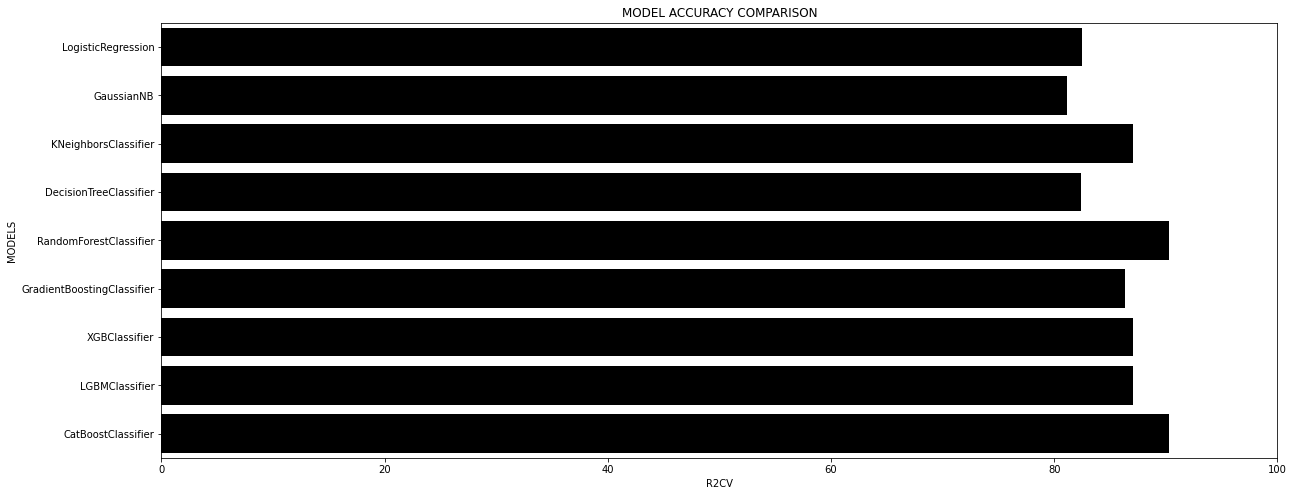

In [158]:
# Accuracy visualization

r = pd.DataFrame(columns=["MODELS","R2CV"])
for model in modelsc:
    name = model.__class__.__name__
    R2CV = cross_val_score(model,xTest,yTest,cv=10,verbose=False).mean()
    result = pd.DataFrame([[name,R2CV*100]],columns=["MODELS","R2CV"])
    r = r.append(result)
    
figure = plt.figure(figsize=(20,8))   
sns.barplot(x="R2CV",y="MODELS",data=r,color="k")
plt.xlabel("R2CV")
plt.ylabel("MODELS")
plt.xlim(0,100)
plt.title("MODEL ACCURACY COMPARISON")
plt.show()

[12:36:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:36:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:36:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:36:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

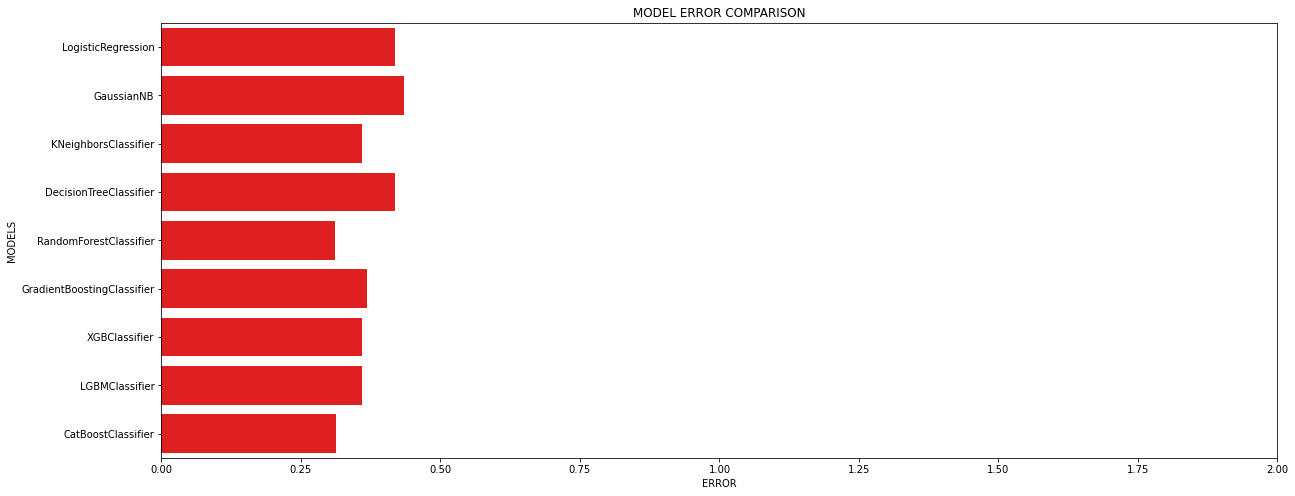

In [159]:
# Error visualization

r = pd.DataFrame(columns=["MODELS","error"])
for model in modelsc:
    name = model.__class__.__name__
    error = -cross_val_score(model,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
    result = pd.DataFrame([[name,np.sqrt(error)]],columns=["MODELS","error"])
    r = r.append(result)
    
figure = plt.figure(figsize=(20,8))   
sns.barplot(x="error",y="MODELS",data=r,color="r")
plt.xlabel("ERROR")
plt.ylabel("MODELS")
plt.xlim(0,2)
plt.title("MODEL ERROR COMPARISON")
plt.show()

### CNN - ADDITIONAL

In [160]:
scaler = StandardScaler().fit(xTrain,yTrain)
xRTrain = scaler.transform(xTrain)
xRTest = scaler.transform(xTest)

In [161]:
mlpc = MLPClassifier().fit(xRTrain,yTrain)
predict = mlpc.predict(xRTest)

R2CV = cross_val_score(mlpc,xRTest,yTest,cv=10).mean()
print(R2CV)
error = -cross_val_score(mlpc,xRTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(error))

0.8387500000000001
0.39317087040284826


### LOGIT - ADDITIONAL

In [185]:
loj = sm.Logit(yTrain,xTrain).fit()
print(loj.summary())

Optimization terminated successfully.
         Current function value: 0.551601
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  614
Model:                          Logit   Df Residuals:                      606
Method:                           MLE   Df Model:                            7
Date:                Mon, 05 Apr 2021   Pseudo R-squ.:                  0.1455
Time:                        13:23:40   Log-Likelihood:                -338.68
converged:                       True   LL-Null:                       -396.34
Covariance Type:            nonrobust   LLR p-value:                 7.214e-22
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1411      0.037      3.773      0.000       0.068

It is 0.8387500000000001, Random Forest is still best --> 0.9029166666666667 / %90 Accuracy

# BEST MODEL RANDOM FOREST PROCESS

### Random Forest Predict Probably

In [162]:
predictprob = rfc.predict_proba(xTest)
print(predictprob)
# first columns - 0
# second columns - 1

[[0.23 0.77]
 [0.96 0.04]
 [1.   0.  ]
 [0.94 0.06]
 [0.93 0.07]
 [0.13 0.87]
 [0.96 0.04]
 [0.87 0.13]
 [0.41 0.59]
 [0.95 0.05]
 [0.35 0.65]
 [0.73 0.27]
 [0.68 0.32]
 [0.77 0.23]
 [0.93 0.07]
 [0.48 0.52]
 [0.92 0.08]
 [0.98 0.02]
 [0.07 0.93]
 [0.52 0.48]
 [0.96 0.04]
 [0.93 0.07]
 [0.84 0.16]
 [1.   0.  ]
 [0.59 0.41]
 [0.02 0.98]
 [0.98 0.02]
 [0.97 0.03]
 [0.95 0.05]
 [0.9  0.1 ]
 [0.17 0.83]
 [0.07 0.93]
 [0.34 0.66]
 [0.03 0.97]
 [0.87 0.13]
 [0.12 0.88]
 [0.16 0.84]
 [0.09 0.91]
 [0.96 0.04]
 [0.04 0.96]
 [0.96 0.04]
 [0.85 0.15]
 [0.85 0.15]
 [0.07 0.93]
 [0.99 0.01]
 [0.32 0.68]
 [0.28 0.72]
 [0.91 0.09]
 [0.99 0.01]
 [0.16 0.84]
 [1.   0.  ]
 [0.18 0.82]
 [0.17 0.83]
 [0.23 0.77]
 [0.88 0.12]
 [0.96 0.04]
 [0.86 0.14]
 [0.98 0.02]
 [0.65 0.35]
 [0.02 0.98]
 [0.07 0.93]
 [0.99 0.01]
 [0.46 0.54]
 [0.48 0.52]
 [0.95 0.05]
 [0.64 0.36]
 [0.99 0.01]
 [0.03 0.97]
 [0.99 0.01]
 [0.28 0.72]
 [0.14 0.86]
 [0.95 0.05]
 [0.99 0.01]
 [0.86 0.14]
 [0.97 0.03]
 [0.79 0.21]
 [0.96 0.04]

### Random Forest Importance

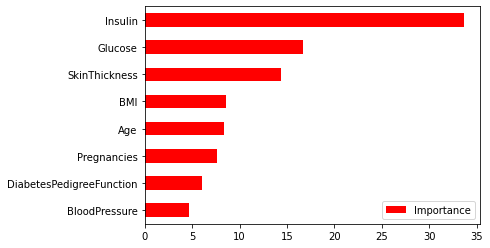

In [165]:
Importance = pd.DataFrame({"Importance": rfc.feature_importances_ * 100},
                          index=xTrain.columns)


Importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh", color="r")
plt.show()

### Random Forest Tuning

In [166]:
params = {"max_depth": [2, 5, 8, 10],
          "max_features": [2, 5, 8],
          "n_estimators": [10, 500, 1000],
          "min_samples_split": [2, 5, 10]}
# you can change parameters

In [167]:
cv = GridSearchCV(rfc,params,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
print(cv.best_params_)
print(cv.best_score_)

{'max_depth': 8, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 1000}
0.8991274457958752


### Final Random Forest Model

In [168]:
rfctuned = RandomForestClassifier(max_depth=8,max_features=8,
                                 min_samples_split=2,n_estimators=1000).fit(xTrain,yTrain)
predicttuned = rfctuned.predict(xTest)

R2CVtuned = cross_val_score(rfctuned,xTest,yTest,cv=10).mean()
print(R2CVtuned)
errortuned = -cross_val_score(rfctuned,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errortuned))

0.89625
0.32210246816812815


Best is still RandomForestClassifier Basic Parameters --> 0.9029166666666667 / %90 Accuracy

# PREDICTION FOR NUMERICAL VALUES 

* Pregnancies: 
Number of times pregnant

* Glucose: 
Plasma glucose concentration a 2 hours in an oral glucose tolerance test

* BloodPressure: 
Diastolic blood pressure (mm Hg)

* SkinThickness: 
Triceps skin fold thickness (mm)

* Insulin: 
2-Hour serum insulin (mu U/ml)

* BMI: 
Body mass index (weight in kg/(height in m)^2)

* DiabetesPedigreeFunction: 
Diabetes pedigree function

* Age: 
Age (years)

* Outcome: 
Class variable (0 or 1) --> we will not assume this

### Dependent and Independent Variables ( X & Y )

In [171]:
xN = data.drop(["Outcome","Glucose"],axis=1)
# we will predict Glucose tolerance for example
# you can pick other parameters
yN = data["Glucose"]


xnTrain,xnTest,ynTrain,ynTest = train_test_split(xN,yN,test_size=0.2,random_state=42)

### REGRESSION MODELS

In [172]:
lm = LinearRegression().fit(xnTrain,ynTrain)
pls = PLSRegression().fit(xnTrain,ynTrain)
ridge = Ridge().fit(xnTrain,ynTrain)
lasso = Lasso().fit(xnTrain,ynTrain)
elasticnet = ElasticNet().fit(xnTrain,ynTrain)
knnr = KNeighborsRegressor().fit(xnTrain,ynTrain)
cartr = DecisionTreeRegressor(random_state=42).fit(xnTrain,ynTrain)
baggr = BaggingRegressor(random_state=42,bootstrap_features=True,verbose=False).fit(xnTrain,ynTrain)
rfr = RandomForestRegressor(random_state=42,verbose=False).fit(xnTrain,ynTrain)
gbmr = GradientBoostingRegressor(verbose=False).fit(xnTrain,ynTrain)
xgbr = XGBRegressor().fit(xnTrain,ynTrain)
lgbmr = LGBMRegressor().fit(xnTrain,ynTrain)
catbr = CatBoostRegressor(verbose=False).fit(xnTrain,ynTrain)

In [173]:
models = [lm,pls,ridge,lasso,elasticnet,knnr,
         cartr,baggr,rfr,gbmr,xgbr,lgbmr,catbr]
# models for comparison

In [174]:
for model in models:
    name = model.__class__.__name__
    R2CV = cross_val_score(model,xnTest,ynTest,cv=10,scoring="r2").mean()
    error = -cross_val_score(model,xnTest,ynTest,cv=10,scoring="neg_mean_squared_error").mean()
    print(name + ": ")
    print("-" * 10)
    print(R2CV)
    print(np.sqrt(error))
    print("-" * 30)

LinearRegression: 
----------
0.2594799180495438
25.503492002529917
------------------------------
PLSRegression: 
----------
0.255530300347635
25.523071832103682
------------------------------
Ridge: 
----------
0.2613300401631441
25.473819982056067
------------------------------
Lasso: 
----------
0.2804648602739216
25.169742998229555
------------------------------
ElasticNet: 
----------
0.2814194285018992
25.154113132925755
------------------------------
KNeighborsRegressor: 
----------
0.1163493671640344
27.85827405517674
------------------------------
DecisionTreeRegressor: 
----------
-0.49885919889725416
35.57584035081486
------------------------------
BaggingRegressor: 
----------
0.18845660201736533
26.599580468596194
------------------------------
RandomForestRegressor: 
----------
0.17493979901096288
26.810334785147063
------------------------------
GradientBoostingRegressor: 
----------
0.006036808395219351
29.668541510357976
------------------------------
XGBRegressor: 
-

### PCR - ADDITIONAL

In [179]:
pca = PCA()
xnRTrain = pca.fit_transform(scale(xnTrain))
xnRTest = pca.fit_transform(scale(xnTest))

In [180]:
lmP = LinearRegression().fit(xnRTrain,ynTrain)
R2CV = cross_val_score(lmP,xnRTest,ynTest,cv=10,scoring="r2").mean()
error = -cross_val_score(lmP,xnRTest,ynTest,cv=10,scoring="neg_mean_squared_error").mean()

print(R2CV)
print(np.sqrt(error))

0.25947991804954157
25.503492002529942


### CNN - ADDITIONAL

In [181]:
scaler = StandardScaler().fit(xnTrain,ynTrain)
xnRTrain = scaler.transform(xnTrain)
xnRTest = scaler.transform(xnTest)

In [182]:
mlpr = MLPRegressor().fit(xnTrain,ynTrain)

R2CV = cross_val_score(mlpr,xnRTest,ynTest,cv=10,scoring="r2").mean()
error = -cross_val_score(mlpr,xnRTest,ynTest,cv=10,scoring="neg_mean_squared_error").mean()

print(R2CV)
print(np.sqrt(error))

-13.102058685790576
110.57380567804654


### OLS - ADDITIONAL

In [175]:
ols = sm.OLS(ynTrain,xnTrain).fit()
print(ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                Glucose   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1893.
Date:                Mon, 05 Apr 2021   Prob (F-statistic):                        0.00
Time:                        13:18:44   Log-Likelihood:                         -2878.1
No. Observations:                 614   AIC:                                      5770.
Df Residuals:                     607   BIC:                                      5801.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

Best is OLS --> 0.956 / R2 %95

> Always use classifiers for any classification problems that involve 0-1